# Using Torch

## Linear Model

### Creating the Data

In [2]:
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt

First create the training data that we want to model:

In [12]:
N = 100
x = np.linspace(start=1, stop=10, num=N)
e = np.random.normal(0, 1, N)
y = x + e
x = torch.from_numpy(x).reshape(-1, 1).float()
y = torch.from_numpy(y).reshape(-1, 1).float()


Then the weights to use with the model

In [16]:
h1 = 1
w1: torch.Tensor = torch.tensor(np.random.normal(0, 1, (1, h1)), requires_grad=True)

Then define the model:

In [17]:
def model(x):
    x = torch.matmul(x, w1.float())
    return x

And preview the data and model with the current weight:

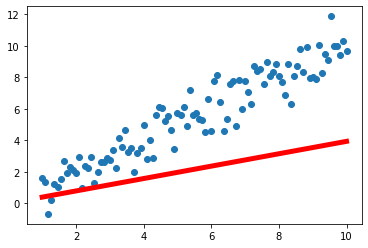

In [19]:
plt.scatter(x, y )
yhat = model(x).detach().numpy()
plt.plot(x, yhat, color="red", linewidth = 5)
plt.show()


### Training the model

In [24]:
eta = 1e-6
losses = []
EPOCH = 10000

print("|------------------------------------------------------------------------------|")
print(" ", end='', flush=True)
for t in range(EPOCH):
    # Forward pass
    yhat = model(x.float())

    # Measure the loss
    loss: torch.Tensor = torch.sum((yhat - y)**2)
    loss.backward()
    losses.append(loss.detach().numpy())

    # Backprop
    with torch.no_grad():
        temp = w1 - w1.grad * eta
        w1.copy_(temp)
        w1.grad = None # MUST zero the grad
        
    # Print Progress
    if t in np.floor(np.linspace(start=0, stop=EPOCH, num=78)):
        print("#", end='', flush=True)

|------------------------------------------------------------------------------|
 #############################################################################

#### Preview Loss

Because the loss has been trained on **all** the data rather than batces, the expectation is that it will be monotone, there should be no jumps

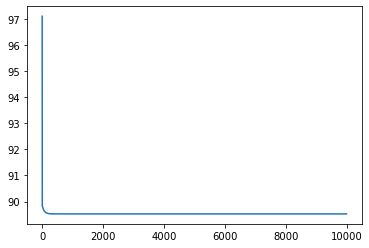

In [26]:
plt.plot(losses)
plt.show()

#### Preview the model

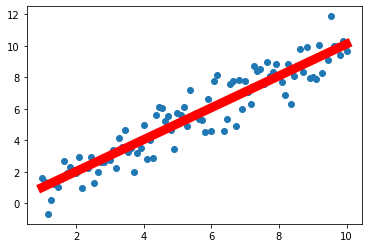

In [27]:
plt.scatter(x, y )
yhat = model(x).detach().numpy()
plt.plot(x, yhat, color="red", linewidth = 9)
plt.show()

## Non-Linear Model

### Creating the Data

In [56]:
# Imports
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt

# Create Data
N = 30
x = np.linspace(start=1, stop=10, num=N)
e = np.random.normal(0, 10, N)
y = x *x + e
x = torch.from_numpy(x).reshape(-1, 1).float()
y = torch.from_numpy(y).reshape(-1, 1).float()

# Generate Weights
h1 = 32
h2 = 16
w1: torch.Tensor = torch.tensor(np.random.normal(0, 1, (1, h1)), requires_grad=True)
w2: torch.Tensor = torch.tensor(np.random.normal(0, 1, (h1, h2)), requires_grad=True)
w3: torch.Tensor = torch.tensor(np.random.normal(0, 1, (h2, 1)), requires_grad=True)



### Creating the Model

In [57]:
def model(x):
    x = torch.matmul(x, w1.float())
    x = torch.sigmoid(x)
    x = torch.matmul(x, w2.float())
    x = torch.sigmoid(x)
    x = torch.matmul(x, w3.float())
    return x

### Training the Model

|------------------------------------------------------------------------------|
 #############################################################################

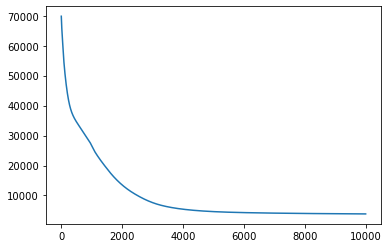

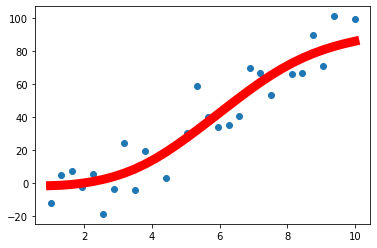

In [58]:
eta = 5*1e-6
losses = []
EPOCH = 10000
print("|------------------------------------------------------------------------------|")
print(" ", end='', flush=True)
for t in range(EPOCH):
# Forward pass
    yhat = model(x.float())

# Measure the loss
    loss: torch.Tensor = torch.sum((yhat - y)**2)
    loss.backward()
    losses.append(loss.detach().numpy())

    for p in [w1, w2, w3]:
        with torch.no_grad():
            temp = p - p.grad * eta
            p.copy_(temp)
            p.grad = None

    if t in np.floor(np.linspace(start=0, stop=EPOCH, num=78)):
        print("#", end='', flush=True)


plt.plot(losses)
plt.show()


plt.scatter(x, y )
yhat = model(x).detach().numpy()
plt.plot(x, yhat, color="red", linewidth = 9)
plt.show()